# Project: Investigate a Dataset - [No-show medical appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
>
>● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
>
>● ‘Neighborhood’ indicates the
location of the hospital.
>
>● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
>
>● the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.
> 

### Some questions we can ask for nvestigation this data set :

> Q1: Did Age effect on attendance?!
>
> Q2 : Is there relation between age and Diseases?!
>
> Q3 : Is there relation between Neighbourhood and Attendance?!
>
> Q4 : Did received SMS effect on attendance?!

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, i will load in the data, check for cleanliness, and then trim and clean  dataset for analysis.


### General Properties

In [71]:
# import all of the packages.
import pandas as ps
import numpy as np 
import matplotlib as plt 
import seaborn as sb
%matplotlib inline

In [72]:
#read data file by using read_csv function
df_med = ps.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [73]:
#show sample of data
df_med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [74]:
#show shape of data
df_med.shape

(110527, 14)

In [75]:
df_med.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### mean age is 37, max age is 115 and min age is -1 ( we must select all rows that have -1 age and clear them)

### show  rows that have Age = -1 

In [76]:
m= df_med.query('Age=="-1"')
m

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [77]:
df_med.duplicated().sum()

0

In [78]:
df_med['PatientId'].isnull().sum()

0

In [79]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [80]:
df_med['PatientId'].nunique()

62299

In [81]:
df_med['PatientId'].duplicated().sum()

48228

In [82]:
df_med.duplicated(['PatientId','No-show']).sum()

38710

## Data Cleaning

### 1- Rename  columns' names  to correct names 

In [83]:
df_med.rename(columns ={"Hipertension":"Hypertension"}, inplace = True)
df_med.rename(columns ={"Handcap":"Handicap"}, inplace = True)
df_med.rename(columns ={"Alcoholism":"Alcoholism"}, inplace = True)
df_med.rename(columns ={"No-show":"No_show"}, inplace = True)
df_med.rename(columns ={"Neighbourhood":"Neighborhood"}, inplace = True)

#### check columns' names

In [84]:
df_med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 2- Delete row that have -1 age !

In [85]:
df_med.drop(index=99832 ,inplace = True)

#### Check minimum  age in all data

In [86]:
df_med.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### minimum age is zero 

### 3- delete all duplicate rows that have the ID and show status

In [87]:
df_med.drop_duplicates(['PatientId','No_show'],inplace=True)

#### check number of rows after delete duplicated rows

In [88]:
df_med.shape

(71816, 14)

### 4- Delete unnecessary columns

In [89]:
df_med.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis =1 , inplace =True )

#### check rename columns 

In [90]:
df_med.head()

,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

>**Compute statistics** and **create visualizations** 

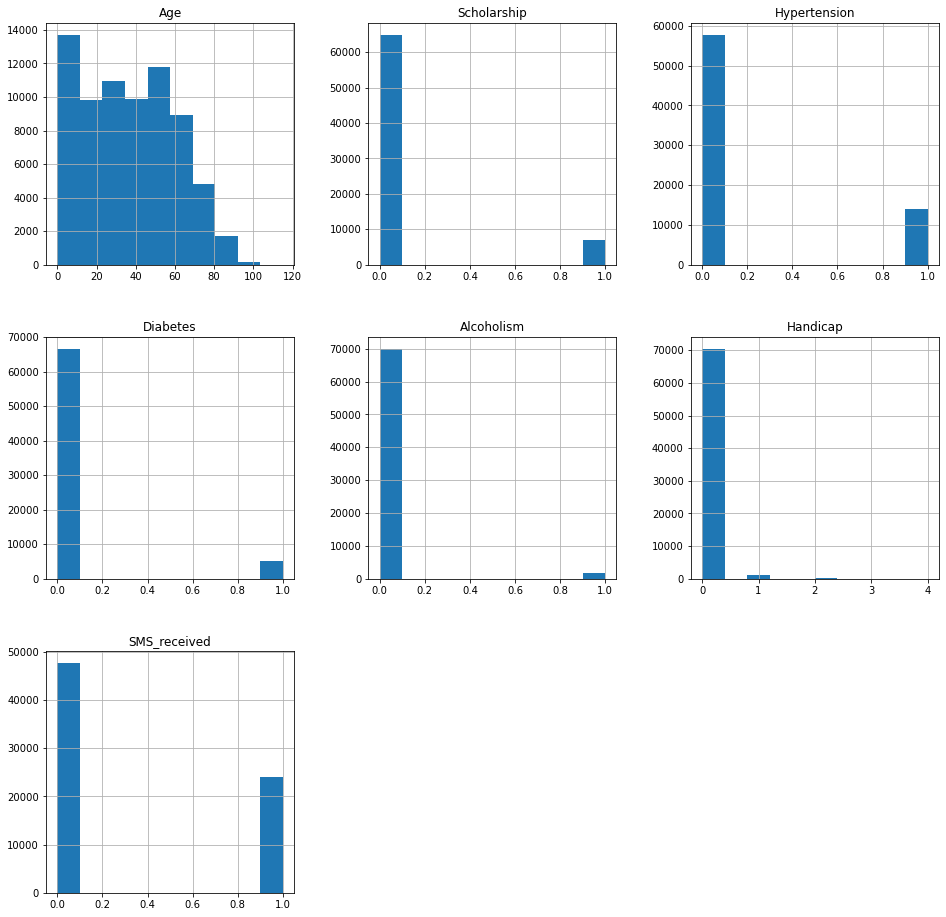

In [91]:
df_med.hist(figsize = (16,16));

> - Half of patients didn't receive sms
>
> - Almost of patients had Scholarship
>
> - Almost of patients didn't suffer from Diabetes, Alcoholism or Handicap
>
> - More than 10000 patients suffered from Hypertension

### Separted show satuts and no show

In [92]:
s_show = df_med.No_show == 'No'
s_no_show = df_med.No_show =='Yes'

In [93]:
df_med[s_show].count()

Gender          54153
Age             54153
Neighborhood    54153
Scholarship     54153
Hypertension    54153
Diabetes        54153
Alcoholism      54153
Handicap        54153
SMS_received    54153
No_show         54153
dtype: int64

In [94]:
df_med[s_no_show].count()

Gender          17663
Age             17663
Neighborhood    17663
Scholarship     17663
Hypertension    17663
Diabetes        17663
Alcoholism      17663
Handicap        17663
SMS_received    17663
No_show         17663
dtype: int64

#### Q1: Did Age effect on attendance?!

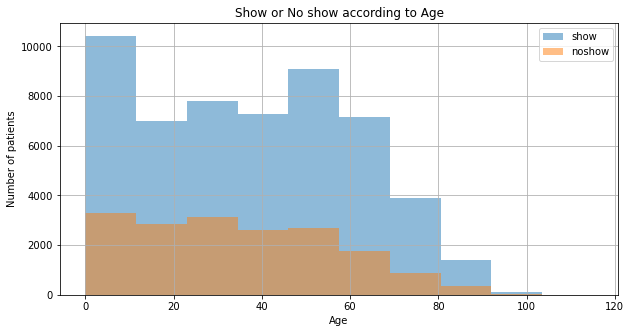

In [99]:
#Figure relation between age and attendance
from matplotlib import *
import sys
from pylab import *
def attendance(df,colunm,sho,no_sho):
    
    plt.figure(figsize=(10,5))
    df_med.Age[s_show].hist(alpha = 0.5 , label = 'show')
    df_med.Age[s_no_show].hist(alpha =0.5 , label ='noshow')
    plt.legend()
    plt.title('Show or No show according to Age')
    plt.xlabel('Age')
    plt.ylabel('Number of patients') 
attendance(df_med,'Age',s_show,s_no_show)

#### as shown from figure there is a high attendance rate from 1 to 20 years and it's so low from 90 

#### Q2 : Is there relation between age and Diseases?!

Text(0, 0.5, 'Mean of Age')

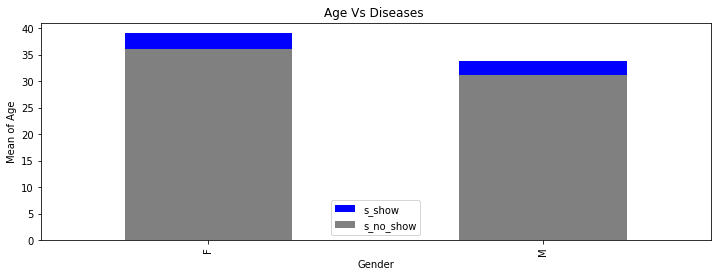

In [96]:
#Figure relation between age and Diseases
plt.figure(figsize=[12,4])
df_med[s_show].groupby("Gender").Age.mean().plot(kind='bar',color='blue' ,label='s_show')
df_med[s_no_show].groupby("Gender").Age.mean().plot(kind='bar',color='grey' ,label='s_no_show')
plt.legend()
plt.title('Age Vs Diseases ')
plt.xlabel('Gender')
plt.ylabel('Mean of Age')

#### Q3 : Is there relation between Neighbourhood and Attendance?!

Text(0, 0.5, 'number of patients')

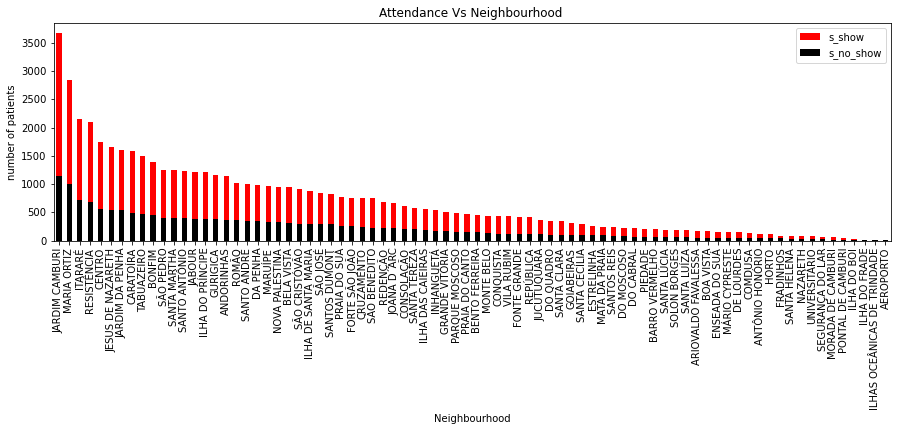

In [98]:
#Figure relation between attendance and Neighbourhood 
plt.figure(figsize=[15,4])
df_med.Neighborhood[s_show].value_counts().plot(kind='bar',color='red' ,label='s_show')
df_med.Neighborhood[s_no_show].value_counts().plot(kind='bar',color='black' ,label='s_no_show')
plt.legend()
plt.title('Attendance Vs Neighbourhood ')
plt.xlabel('Neighbourhood')
plt.ylabel('number of patients')

#### There are place had a high attendance more than other  

### Q4: Did received SMS effect on attendance?!

In [ ]:
#Figure relation between attendance and Received SMS 
plt.figure(figsize=(10,5))
df_med.SMS_received[s_show].hist(alpha = 0.5 ,color ='yellow' ,label = 'show')
df_med.SMS_received[s_no_show].hist(alpha =0.5 ,color='green', label ='noshow')
plt.legend()
plt.title('Show or No show according to received SMS')
plt.xlabel('received SMS')
plt.ylabel('Number of patients') 

#### As shown attendance of patients who did not receive SMS more who received SMS !!!

<a id='conclusions'></a>
## Conclusions
##### Throw this investigation (No-show appointments) data set we fine :

> - Average of age of patients is 37 and max age is 115
>
> - There is a high attendance rate from 1 to 20 years old and it's so low from 90 years old
>
> - There are place had a high attendance more than other, surly for some reasons
>
> - Attendance of patients who did not receive SMS more who received SMS !!!
>
> - Half of patients didn't receive sms
>
> - Almost of patients had Scholarship
>
> - Almost of patients didn't suffer from Diabetes, Alcoholism or Handicap
>
> - More than 10000 patients suffered from Hypertension

### Limitations :
> there are more than 10% of data duplicated, they may affect the final predictions.
>
> So deleted the duplicated data.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Untitled1.ipynb'])